# ML Correlation Notebook
# <h3> By: Peter Giannetos <h3>

In [1]:
# Import needed libraries/APIs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import os
import scipy
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import datetime #YYYY-MM-DD
from datetime import timedelta
import csv

In [2]:
# Authenticates the user's Kaggle API key
# More info on Kaggle's API system: https://github.com/Kaggle/kaggle-api#api-credentials
api = KaggleApi()
api.authenticate()

In [3]:
# Installs required datasets from kaggle into 'Datasets' folder

# New York Stock Exchange
# api.dataset_download_file('dgawlik/nyse', file_name= 'fundamentals.csv', path= 'Datasets')
# api.dataset_download_file('dgawlik/nyse', file_name= 'prices-split-adjusted.csv', path= 'Datasets')
# api.dataset_download_file('dgawlik/nyse', file_name= 'prices.csv', path= 'Datasets')
# api.dataset_download_file('dgawlik/nyse', file_name= 'securities.csv', path= 'Datasets')

# S&P 500 Stock Data
api.dataset_download_file('camnugent/sandp500', file_name= 'all_stocks_5yr.csv', path= 'Datasets')

# Forex Euro/USD
api.dataset_download_file('imetomi/eur-usd-forex-pair-historical-data-2002-2019', file_name= 'eurusd_hour.csv', path= 'Datasets')

True

In [4]:
# Unzips files
path = os.getcwd() + '\Datasets'

target = path + '\eurusd_hour.csv.zip'
with zipfile.ZipFile(target) as handle:
    handle.extractall()

In [5]:
# Monthly volitility of Euro-USD Forex Market
eur_usd_hour = pd.read_csv('eurusd_hour.csv')

import datetime

# Create data lists
date = eur_usd_hour['Date'].tolist()
close_bid = eur_usd_hour['BO'].tolist()

# Initialize CSV File
with open('eur_usd_month_average.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Price"])

#Initialize starting vars
i = 0
list_length = len(date) - 1
format = "%Y-%m-%d"

# Take monthly average of closing prices of the eur/usd forex into a .csv
while i < list_length:
    # Initialize loop vars
    current_date = date[i]
    old_date = date[i]
    time_current_date = datetime.datetime.strptime(current_date, format)
    time_old_date = datetime.datetime.strptime(old_date, format)
    length = 0
    sum_price = 0.0
    exit = False
    # Check if months are the same
    while time_old_date.strftime("%B") == time_current_date.strftime("%B") and exit != True:
        # Check if index is beyond list length
        if i < list_length:
            old_date = current_date
            time_old_date = datetime.datetime.strptime(old_date, format)
            sum_price += close_bid[i]
            length += 1
            i += 1
            current_date = date[i]
            time_current_date = datetime.datetime.strptime(current_date, format)
        else:
            exit = True
    # Write data to new .csv row
    average_month = sum_price/length
    average_date = date[i]
    with open('eur_usd_month_average.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([average_date, average_month])

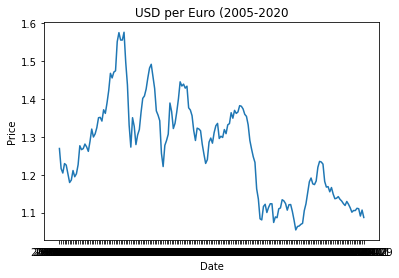

In [71]:
# Graph monthly Euro USD Forex Market
eur_usd_month = pd.read_csv('eur_usd_month_average.csv')
x = eur_usd_month['Date'].tolist()
y = eur_usd_month['Price'].tolist()
plt.plot(x,y)
plt.title("USD per Euro (2005-2020")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()